In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.cm

import wcs

In [2]:
LANGS_TO_CHECK = [16, 17, 20, 32, 36]

In [3]:
term_maps = {}
word_counts = {}
threshold = 5
color_dists = wcs.all_pairwise_color_distances()
adjacency_dict = wcs.build_adjacency_dict(color_dists, threshold)
for lang in LANGS_TO_CHECK:
    word_counts[lang] = wcs.build_word_count(lang)
    term_maps[lang] = wcs.build_term_map(lang)

Generating Sample for language 16
--------------------
Generating Sample for language 17
--------------------
Generating Sample for language 20
--------------------
Generating Sample for language 32
--------------------
Generating Sample for language 36
--------------------


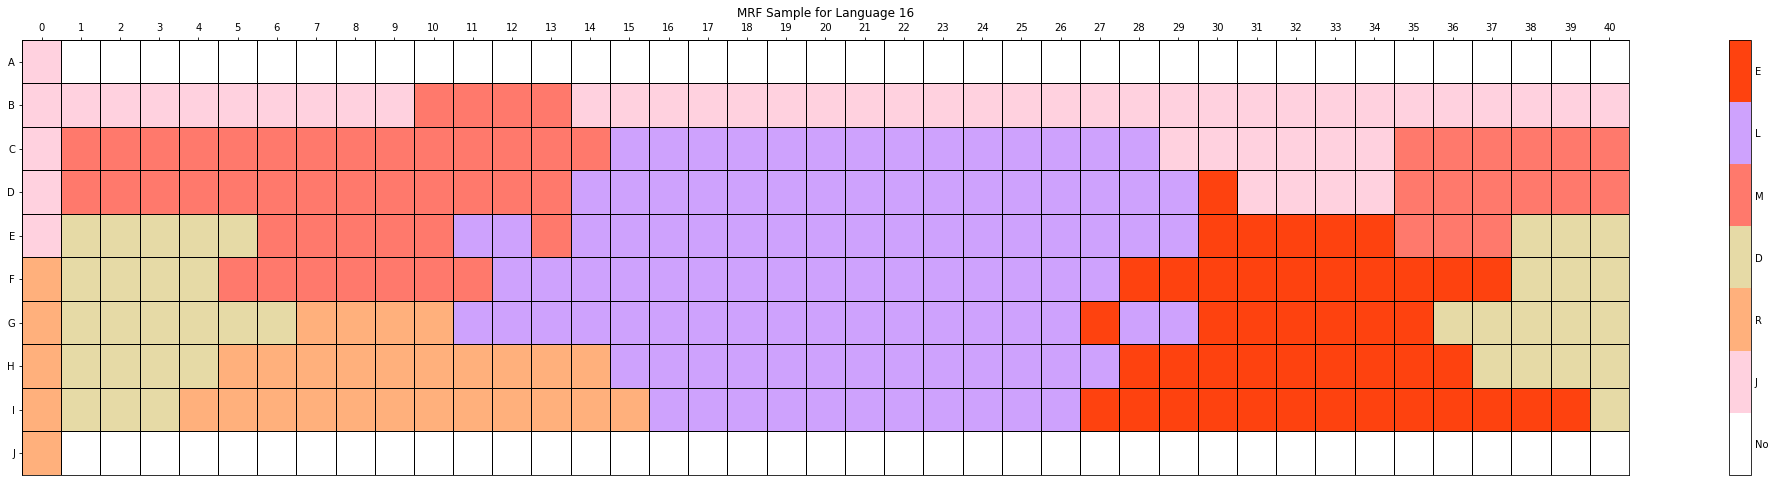

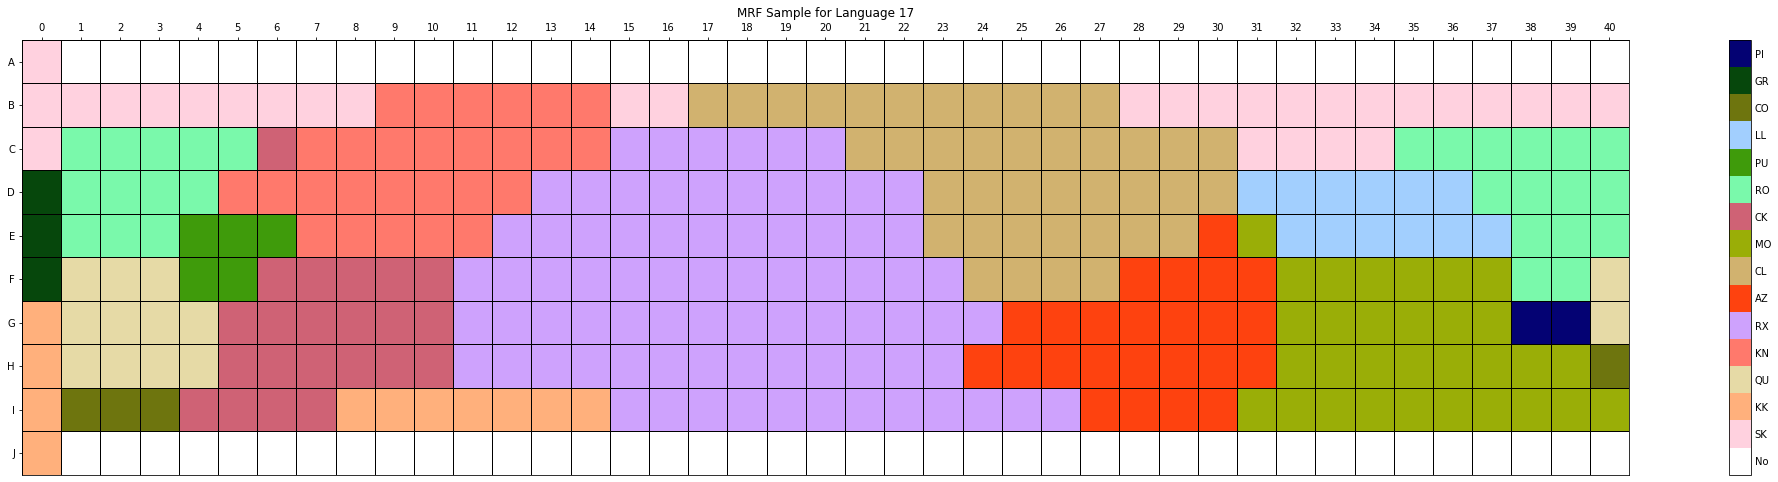

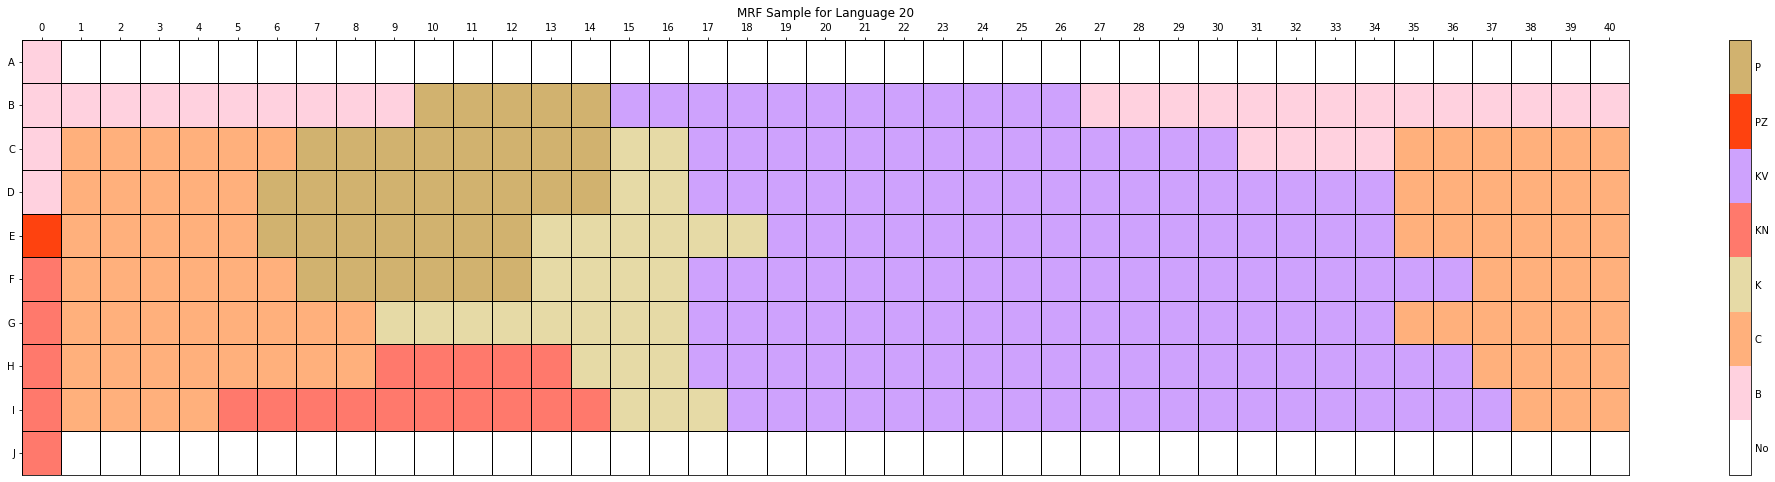

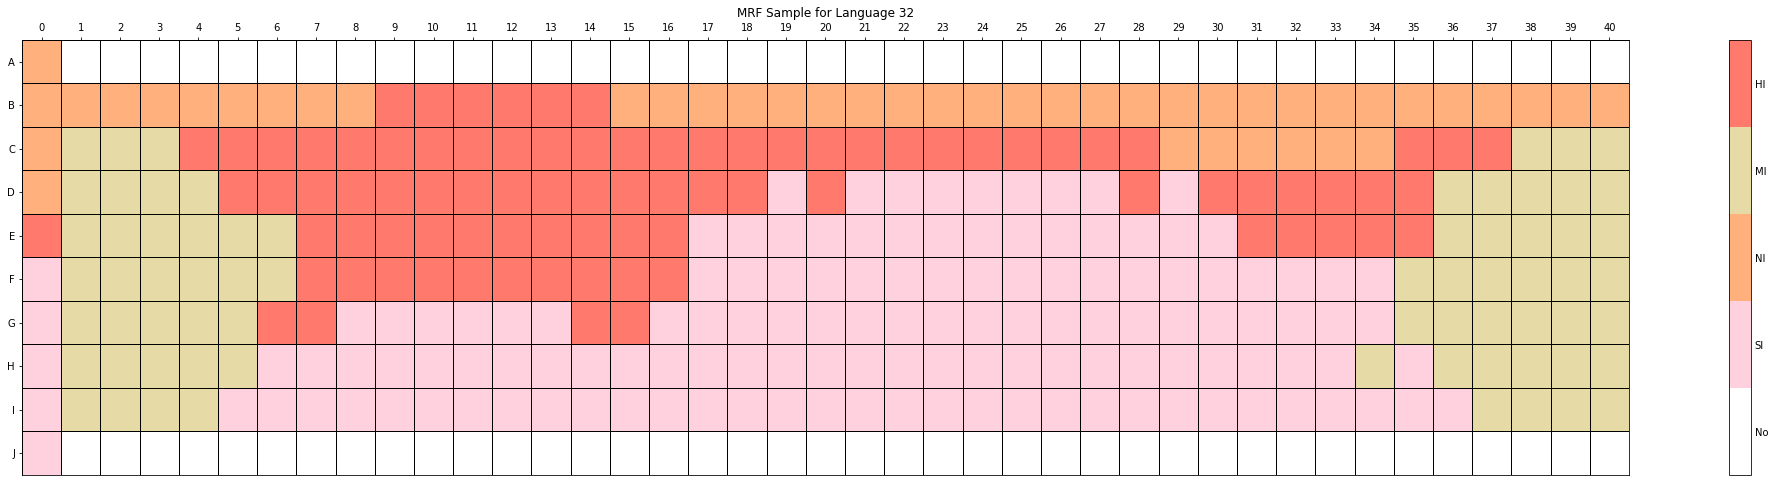

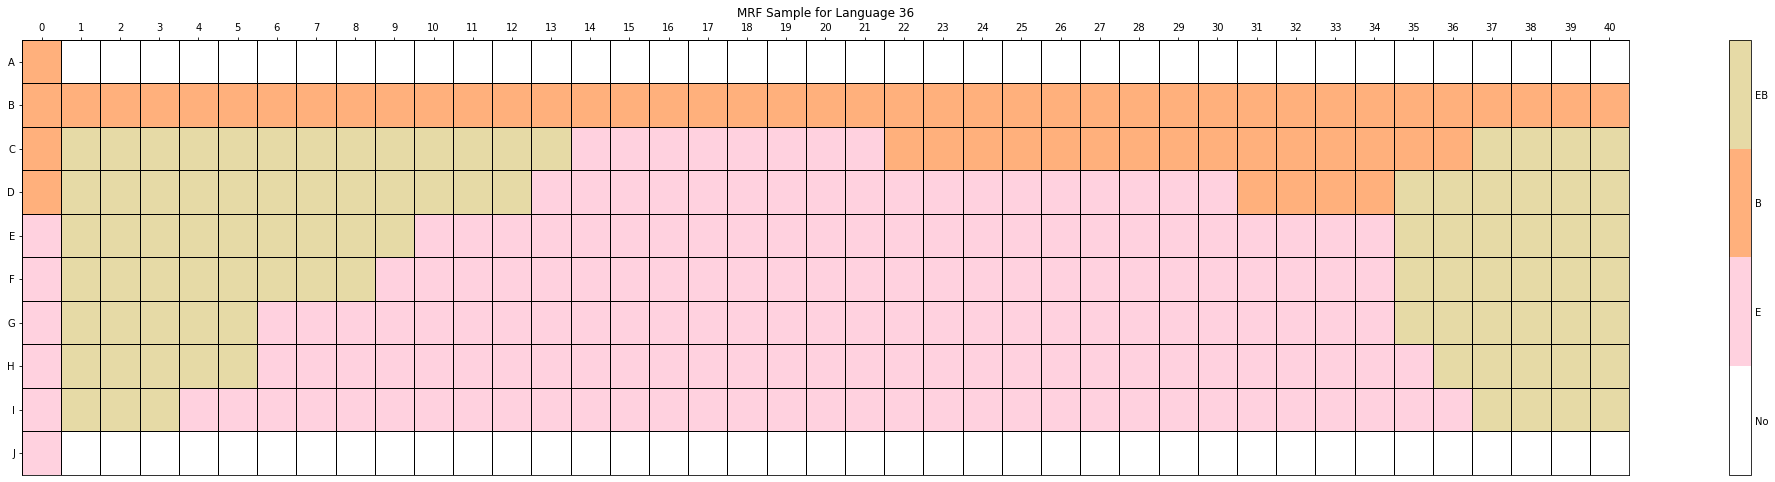

In [8]:
filename = "mrf_grid_sample"
title = "MRF Sample"

# sampler settings
neighbor_weight = 5
burn_in_iterations = 150
num_restarts = 1
num_to_generate = 1

# generate samples for each lang
for lang in LANGS_TO_CHECK:
    print(f"Generating Sample for language {lang}")
    print(f"{20*'-'}")
    samples = wcs.mrf_sampler(word_counts[lang], adjacency_dict, neighbor_weight, num_restarts,
                          burn_in_iterations, num_to_generate)
    assert(len(samples) == 1)
    grid_sample = samples[0]
    chip_to_term = wcs.build_chip_to_term_from_grid_sample(grid_sample, term_maps[lang])
    wcs.color_term_grid(chip_to_term, title, filename, lang, use_contested=False)